In [10]:
!pip install textblob


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 7.0 MB/s eta 0:00:00


In [12]:
# Install necessary libraries
!pip install pandas numpy matplotlib seaborn statsmodels yfinance praw


[*********************100%***********************]  1 of 1 completed


Price                        Adj Close        Close         High          Low  \
Ticker                         BTC-USD      BTC-USD      BTC-USD      BTC-USD   
Date                                                                            
2020-01-01 00:00:00+00:00  7200.174316  7200.174316  7254.330566  7174.944336   
2020-01-02 00:00:00+00:00  6985.470215  6985.470215  7212.155273  6935.270020   
2020-01-03 00:00:00+00:00  7344.884277  7344.884277  7413.715332  6914.996094   
2020-01-04 00:00:00+00:00  7410.656738  7410.656738  7427.385742  7309.514160   
2020-01-05 00:00:00+00:00  7411.317383  7411.317383  7544.497070  7400.535645   

Price                             Open       Volume  
Ticker                         BTC-USD      BTC-USD  
Date                                                 
2020-01-01 00:00:00+00:00  7194.892090  18565664997  
2020-01-02 00:00:00+00:00  7202.551270  20802083465  
2020-01-03 00:00:00+00:00  6984.428711  28111481032  
2020-01-04 00:00:00+00:00  

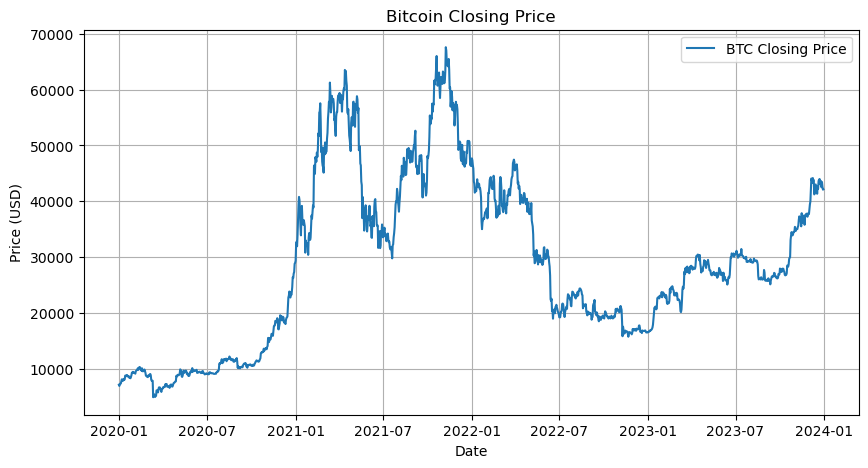

In [14]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


btc_data = yf.download("BTC-USD", start="2020-01-01", end="2023-12-31")


print(btc_data.head())


plt.figure(figsize=(10, 5))
plt.plot(btc_data['Close'], label="BTC Closing Price")
plt.title("Bitcoin Closing Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid()
plt.show()


In [16]:
import pandas as pd


file_path = './reddit_cc.csv'
reddit_data = pd.read_csv(file_path)


reddit_data.head()

,title,score,id,url,comms_num,created,body,timestamp
0,RSUN is in a parabolic rise. The FOMO is real....,0,p4blrv,https://www.reddit.com/r/CryptoCurrency/commen...,18,1.628960e+09,"NFT’s, more specifically NFT card games are ta...",2021-08-14 19:51:50
1,If you see a good post don’t forget to tip the...,2,p4bld3,https://www.reddit.com/r/CryptoCurrency/commen...,37,1.628960e+09,"For people who don’t already know, if you like...",2021-08-14 19:51:10
2,I hope moons fail.,0,p4bl77,https://www.reddit.com/r/CryptoCurrency/commen...,61,1.628960e+09,Everyone in this sub is obsessed with moons. E...,2021-08-14 19:50:55
3,If you could get 1 BTC or 20 ETH or 50000 ADA ...,12,p4bfmn,https://www.reddit.com/r/CryptoCurrency/commen...,126,1.628959e+09,Imagine you get the chance to choose one of th...,2021-08-14 19:42:23
4,My husband (investment banker) doesn’t trust m...,0,p4bb2i,https://www.reddit.com/r/CryptoCurrency/commen...,27,1.628959e+09,\nI love my daughter and want the best for her...,2021-08-14 19:35:17


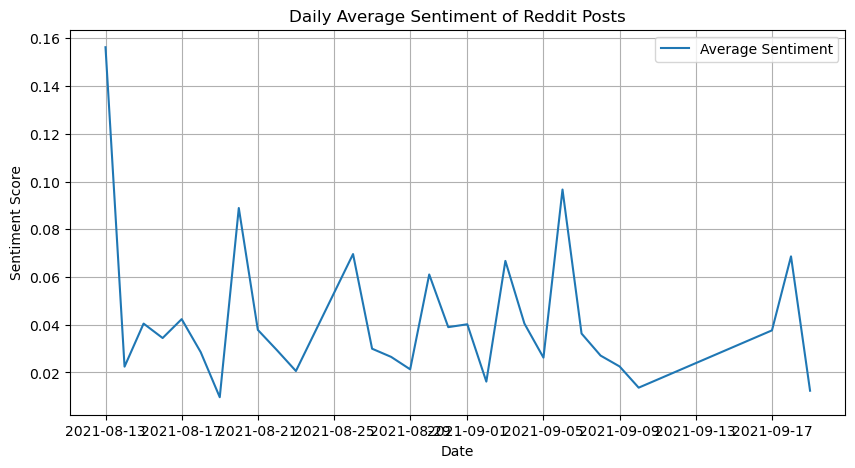

In [18]:
from textblob import TextBlob


reddit_data['timestamp'] = pd.to_datetime(reddit_data['timestamp'])


def calculate_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

reddit_data['sentiment'] = reddit_data['title'].apply(calculate_sentiment)


aggregated_sentiment = reddit_data.groupby(reddit_data['timestamp'].dt.date)['sentiment'].mean()
aggregated_sentiment = aggregated_sentiment.reset_index()
aggregated_sentiment.columns = ['date', 'average_sentiment']


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(aggregated_sentiment['date'], aggregated_sentiment['average_sentiment'], label="Average Sentiment")
plt.title("Daily Average Sentiment of Reddit Posts")
plt.xlabel("Date")
plt.ylabel("Sentiment Score")
plt.legend()
plt.grid()
plt.show()


         date  average_sentiment
0  2021-08-13           0.156275
1  2021-08-14           0.022408
2  2021-08-15           0.040456
3  2021-08-16           0.034405
4  2021-08-17           0.042325


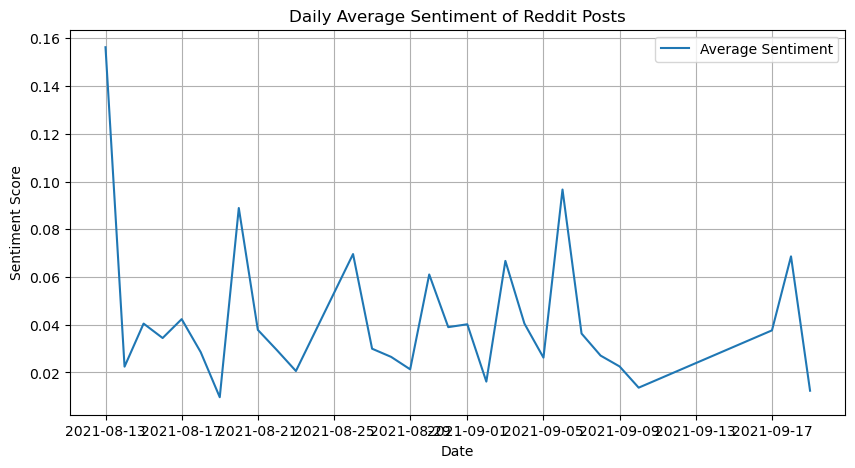

In [20]:
from textblob import TextBlob


def calculate_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity


reddit_data['sentiment'] = reddit_data['title'].apply(calculate_sentiment)


reddit_data['timestamp'] = pd.to_datetime(reddit_data['timestamp'])

aggregated_sentiment = reddit_data.groupby(reddit_data['timestamp'].dt.date)['sentiment'].mean()
aggregated_sentiment = aggregated_sentiment.reset_index()
aggregated_sentiment.columns = ['date', 'average_sentiment']


print(aggregated_sentiment.head())


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(aggregated_sentiment['date'], aggregated_sentiment['average_sentiment'], label="Average Sentiment")
plt.title("Daily Average Sentiment of Reddit Posts")
plt.xlabel("Date")
plt.ylabel("Sentiment Score")
plt.legend()
plt.grid()
plt.show()


         Date  Close_BTC-USD  average_sentiment
0  2021-08-13   47793.320312           0.156275
1  2021-08-14   47096.945312           0.022408
2  2021-08-15   47047.003906           0.040456
3  2021-08-16   46004.484375           0.034405
4  2021-08-17   44695.359375           0.042325


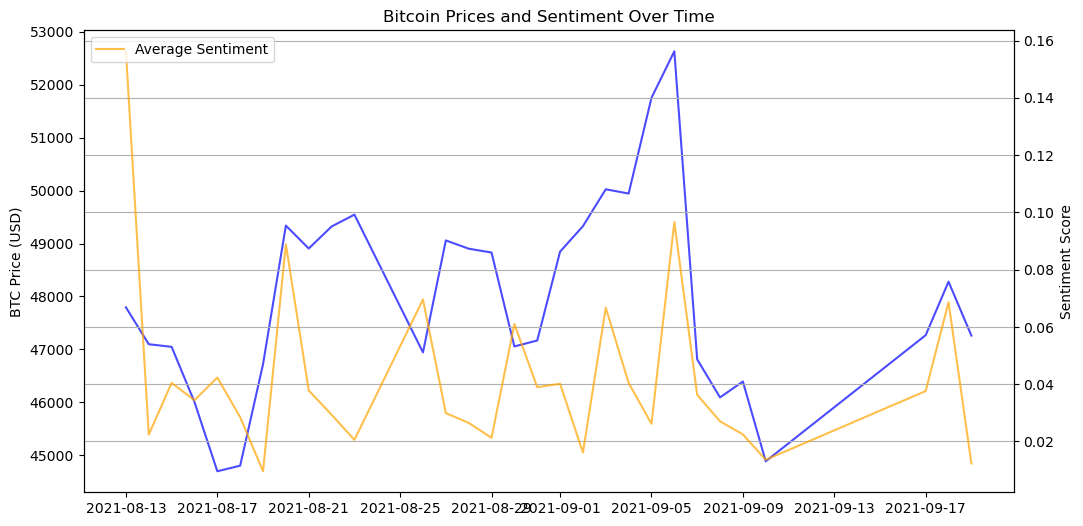

In [28]:
btc_data.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in btc_data.columns]
btc_data_reset = btc_data.reset_index()


btc_data_reset.rename(columns={'Date_': 'Date'}, inplace=True)


btc_data_reset['Date'] = pd.to_datetime(btc_data_reset['Date']).dt.date


aggregated_sentiment['date'] = pd.to_datetime(aggregated_sentiment['date']).dt.date


merged_data = pd.merge(
    btc_data_reset[['Date', 'Close_BTC-USD']],  
    aggregated_sentiment[['date', 'average_sentiment']],
    left_on='Date',
    right_on='date',
    how='inner'
)


merged_data.drop(columns=['date'], inplace=True)


print(merged_data.head())


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))


plt.plot(merged_data['Date'], merged_data['Close_BTC-USD'], label="BTC Closing Price", color='blue', alpha=0.7)
plt.ylabel("BTC Price (USD)")
plt.twinx()  


plt.plot(merged_data['Date'], merged_data['average_sentiment'], label="Average Sentiment", color='orange', alpha=0.7)
plt.ylabel("Sentiment Score")

plt.title("Bitcoin Prices and Sentiment Over Time")
plt.xlabel("Date")
plt.legend(loc="upper left")
plt.grid()
plt.show()
